In [12]:
def numerical_distribution(data, num_cols, hue_col='Gender', figsize=(25, 25), dpi=100):
    colours = ["#00203F8F", "#AD6FD1FF"]
    # Définir les subplots
    rows = (len(num_cols) + 1) // 2 
    fig, ax = plt.subplots(rows, 2, figsize=figsize, dpi=dpi)
    ax = ax.flatten() 
        # La distribution de chaque colonne
    for i, column in enumerate(num_cols):  
        sns.histplot(data=data, x=column, hue=hue_col, ax=ax[i], kde=True, palette=colours)
        ax[i].set_title(f'{column} Distribution', size=14)
        ax[i].set_xlabel(None)
        ax[i].set_ylabel(None)
        
        # "Calculer l'asymétrie."
        '''
        En statistique, l'asymétrie mesure le degré d'asymétrie d'une distribution. Indique si les valeurs sont concentrées d'un côté de la moyenne.
        Asymétrie positive : La queue droite de la distribution est plus longue ou plus grosse, ce qui indique une concentration des données sur la gauche.
        Asymétrie négative : La queue gauche est plus longue, les données étant concentrées sur la droite.
        Asymétrie zéro : Une distribution parfaitement symétrique, comme une distribution normale.
        '''
    
        skewness = skew(data[column].dropna())
        skew_label = f'Asymétrie: {skewness:.2f}'
        
        # Ajouter des annotations de l'asymétrie
        ax[i].annotate(skew_label, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')
    
    # Enelver les subplots inutiles
    for j in range(len(num_cols), len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    



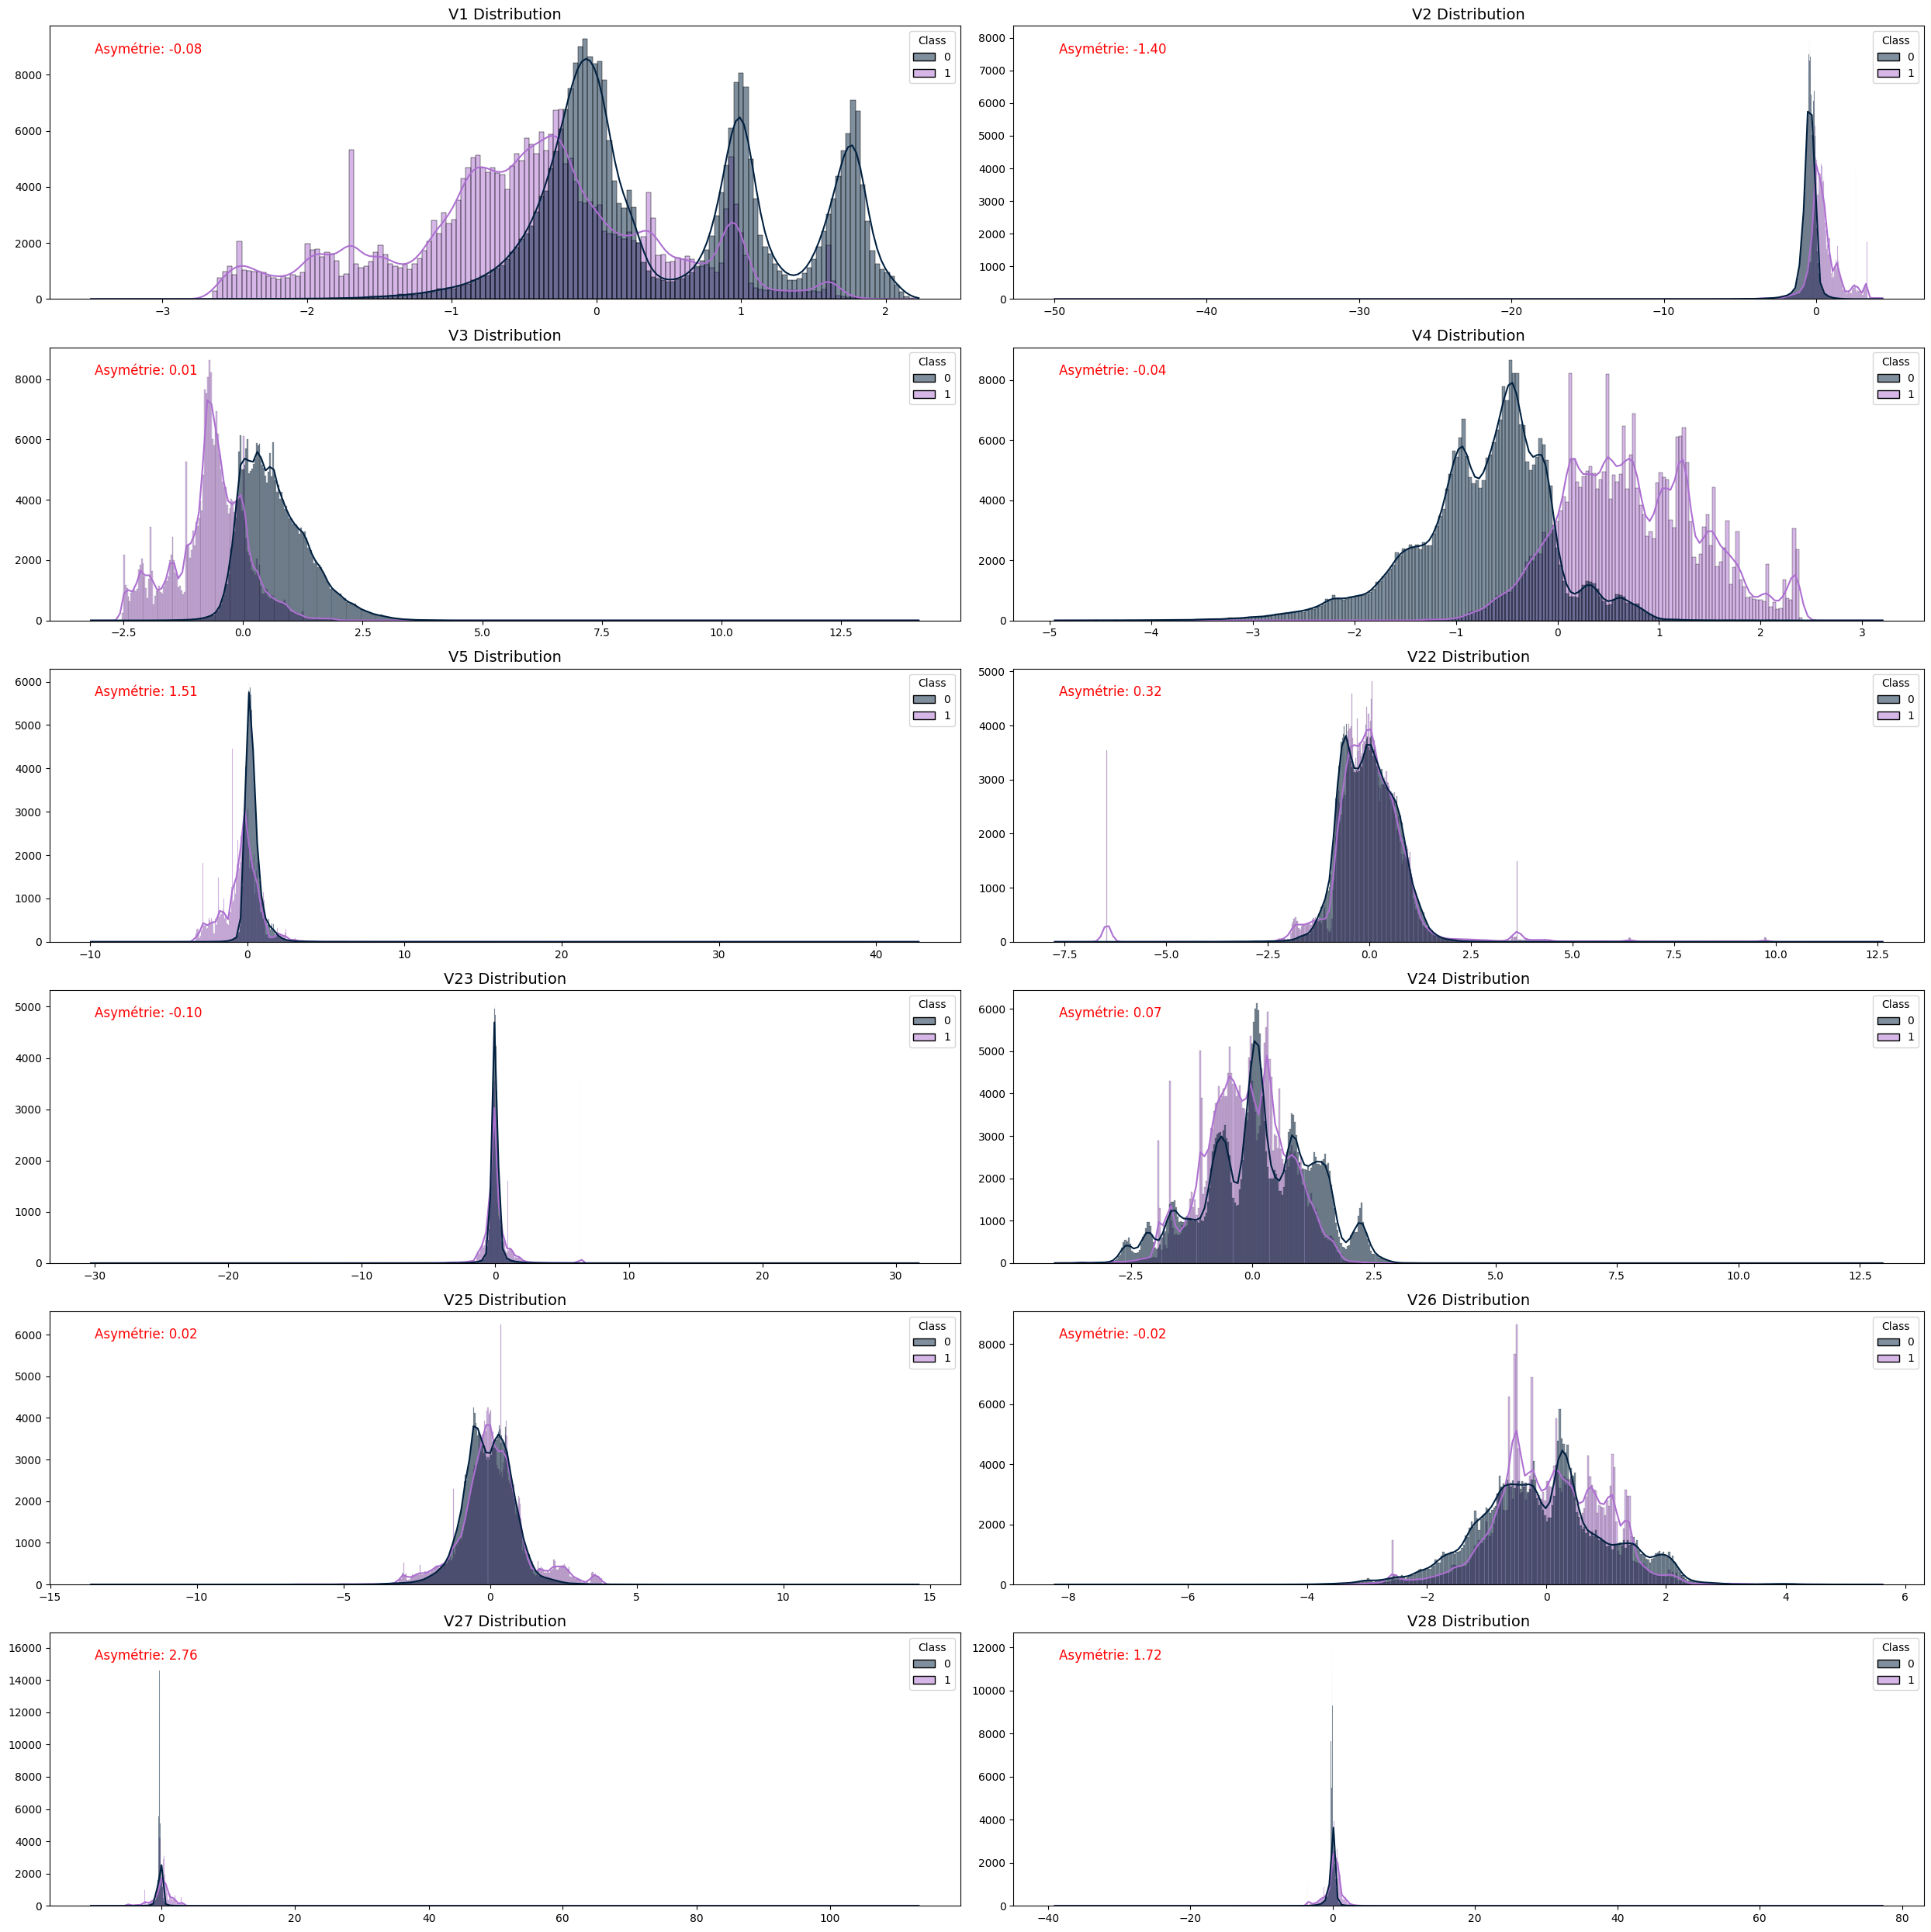

In [13]:
numerical_distribution(dataset,noms_Cols,'Class')

In [14]:
# Normalisation

# Fonction pour normaliser les données

def apply_scaling(data, columns, scaler_type):
    # Vérifier le type de scaler et initialiser l'objet de scaler approprié
    if scaler_type == 'S':
        scaler = StandardScaler()  # Initialiser StandardScaler
    elif scaler_type == 'M':
        scaler = MinMaxScaler()  # Initialiser MinMaxScaler
    elif scaler_type == 'Q':
        scaler = QuantileTransformer(output_distribution='normal')  # Initialiser QuantileTransformer
    else:
        raise ValueError("Type de scaler invalide. Choisissez 'S' pour StandardScaler, 'M' pour MinMaxScaler ou 'Q' pour QuantileTransformer.")

    # Créer une copie des données d'entrée pour éviter de modifier les données d'origine
    scaled_data = data.copy()

    # Appliquer le scaler à toutes les colonnes spécifiées en une seule fois
    scaled_data[columns] = scaler.fit_transform(scaled_data[columns])

    # Retourner les données normalisées
    return scaled_data


In [15]:
# Spécifier les colonnes à normaliser et le type de scaler
columns_to_scale = [col for col in dataset.select_dtypes(include=['float']).columns]  # Filtrer les colonnes de type float
scaler_type = 'M'  # Choisir le type de scaler (MinMaxScaler dans ce cas)

# Appliquer la normalisation aux données d'entraînement
tr_d = apply_scaling(dataset, columns_to_scale, scaler_type)
print('Données normalisées avec succès')


Données normalisées avec succès
